In [1]:
%config InlineBackend.figure_format='retina'
import pandas as pd
import sys
sys.path.append('/Users/apple/Documents/ML_Project/ML - 2.1/module')
from utils import get_data, get_data2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Spain

In [42]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/reslut/Spain_test_dist.csv', index_col=0)
X_train, X_test, Y_train, Y_test = get_data(
            hour_num=1, transform='sin+cos',
            train_index=[6426,8427],
            test_index=[14389,15390],
            return_y_scaler=False)

---- Spain dataset ----
get_data(hour_num=1, transform='sin+cos', drop_time=True, scale=True)

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [6426, 8427] train_len: 2000
test index: [14389, 15390] test_len: 1000


mse: 0.0025145908564548863


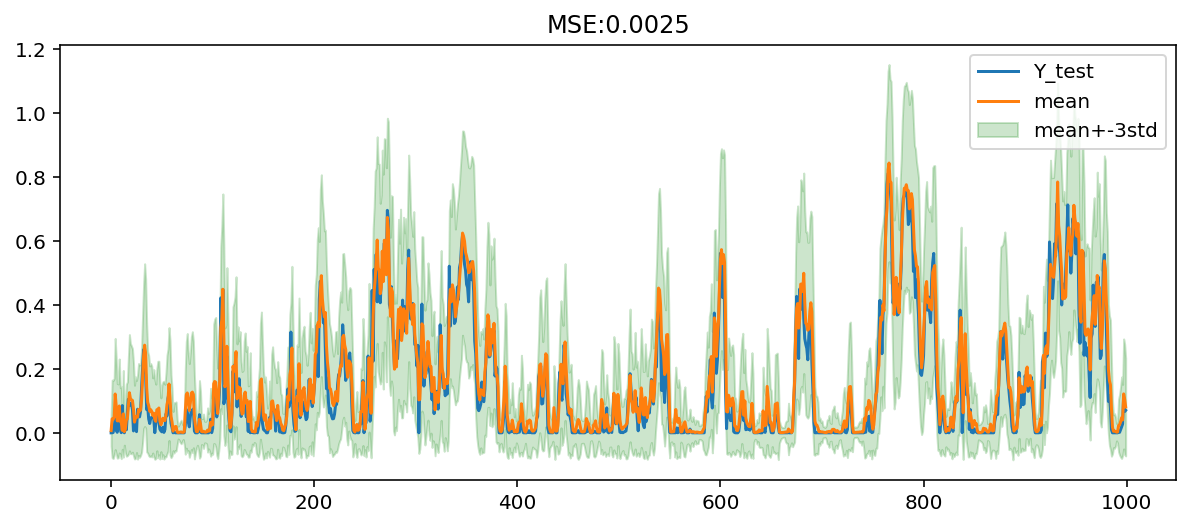

In [43]:
test_MSE = mean_squared_error(Y_test, dist['mean'])
Y_pred = pd.Series(dist['mean'], name='Y_pred')
Upper = dist['mean']+3*dist['std']
Lower = dist['mean']-3*dist['std']

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,4)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)

# US

In [44]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/reslut/US_test_dist.csv', index_col=0)
X_train, X_test, Y_train, Y_test= get_data2(
            hour_num=1, transform='sin+cos',
            train_index=[3001,7002],
            test_index=[2000,3001],
            return_y_scaler=False,
            drop_else=True)

---- US dataset ----
get_data2(hour_num=1, transform='sin+cos', drop_time=True, drop_esle=True, scale=True)

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [3001, 7002] train_len: 4000
test index: [2000, 3001] test_len: 1000


mse: 0.00043997918992500905


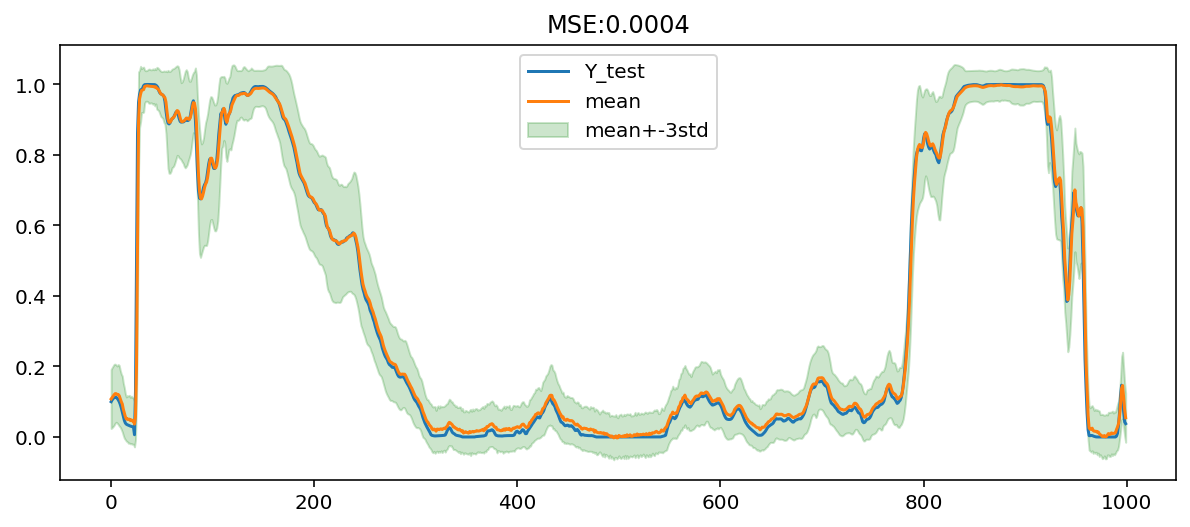

In [45]:
test_MSE = mean_squared_error(Y_test, dist['mean'])
Y_pred = pd.Series(dist['mean'], name='Y_pred')
Upper = dist['mean']+3*dist['std']
Lower = dist['mean']-3*dist['std']

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,4)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)